# Multinomial classification

전에 했던 Logistic regression은 두 종류를 분리해주는 개념

이를 적용하여 Multinomial classification은 여러 종류를 분리해주는 개념으로 생각해보자

# Logistic regression

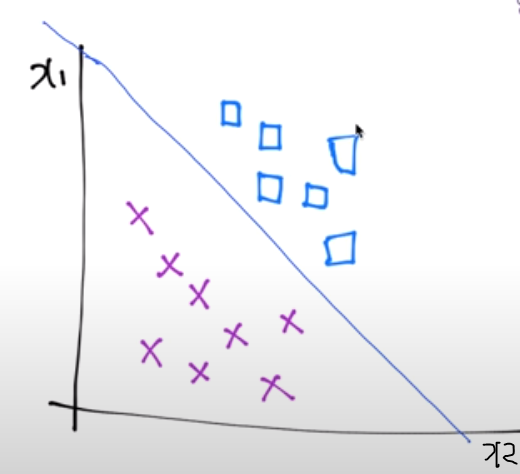


# Multinomial classification

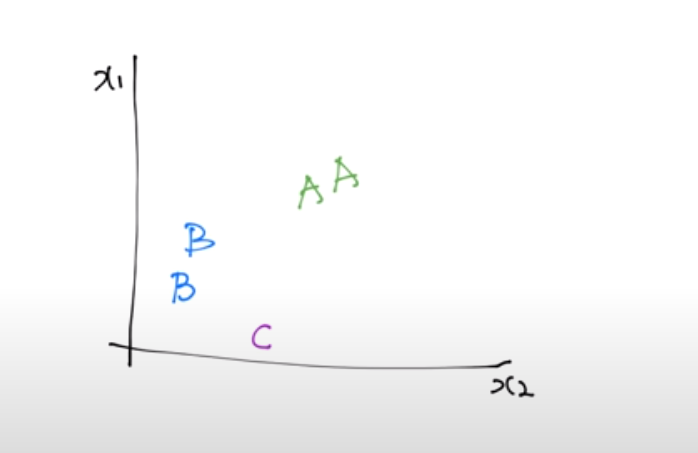

이를 logistic classification에서 했던 것과 같이 하나를 기준으로 나눌 수 있다.

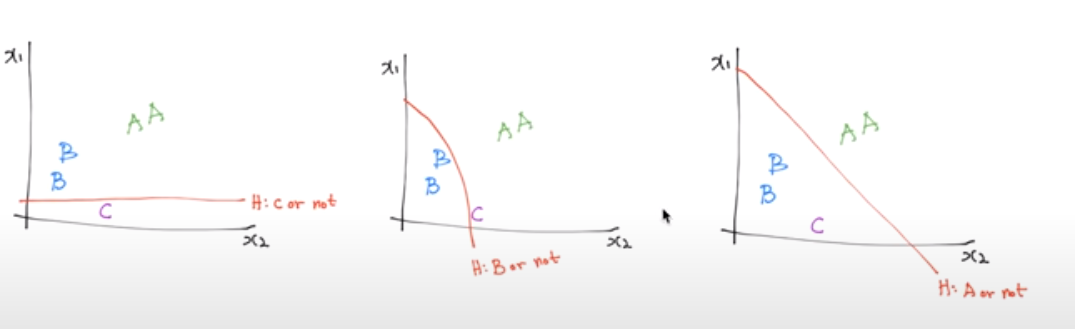

위와 같이 3가지로 각각 분류할 수 있는데 이 3가지를 한 번에 합치면 한 번에 3가지를 분류할 수 있게된다.

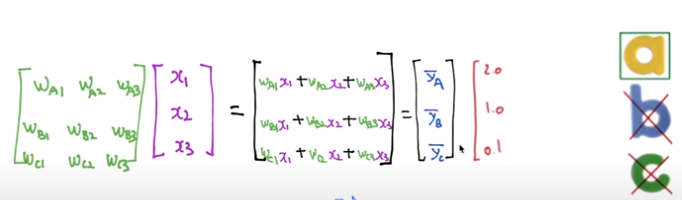

그러나 원하는 것은 시그모이드 같은 0~1사이의 수이다. --> softmax 를 사용하자!!

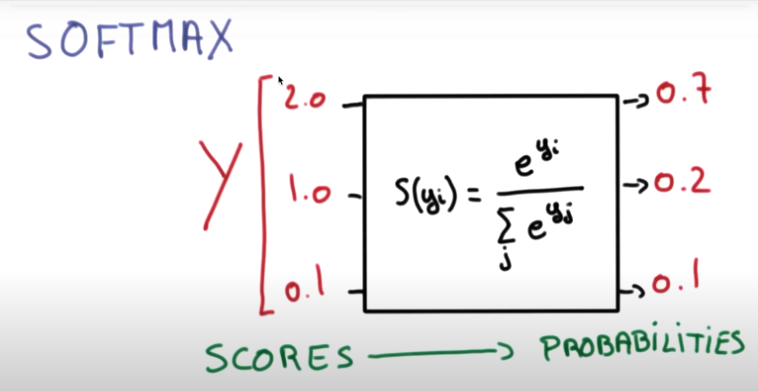

결과 나온 0.7 0.2 0.1 중에 제일 큰 값을 골라주면 된다.(ONE-HOT CODING)

# cost function

실제 값을 y 값 ( 0.7 , 0.2 , 0.1 )   , 예측 값을 (ONE-HOT CODING에 의해 나온 제일 큰 값(1)) 로 하자.

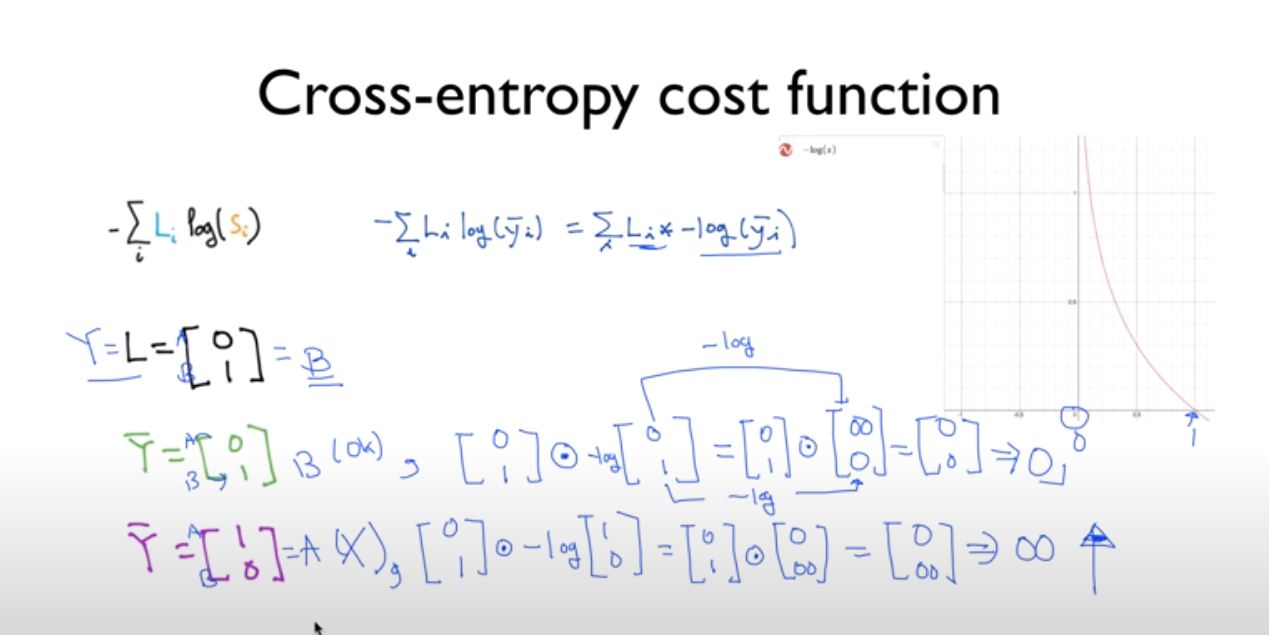


위와 같이 cost function을 나타낼 수 있다. 예측한 값이 맞으면 cost가 0이고 예측한 값이 아니면 cost가 무한대가 되어서 적합하다. 

이렇게 cost를 구하는 방식으로 데이터를 학습시키면 된다.

In [1]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# 텐서플로에서 제공하는 softmax 함수를 이용하여 위에서 설명한 것을 시행
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# learning_rate 를 0.1로 설정하여 GradientDescentOptimizer를시행하자
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

Instructions for updating:
non-resource variables are not supported in the long term
0 3.9307914
200 0.49251753
400 0.38279054
600 0.28668976
800 0.23393726
1000 0.21145627
1200 0.19295456
1400 0.17740984
1600 0.16414914
1800 0.1526981
2000 0.14270972
--------------
[[2.6235091e-03 9.9736708e-01 9.3491481e-06]] [1]
--------------
[[0.8871144  0.09701845 0.0158672 ]] [0]
--------------
[[5.4152522e-09 2.7104141e-04 9.9972898e-01]] [2]
--------------
[[2.6235040e-03 9.9736708e-01 9.3491481e-06]
 [8.8711423e-01 9.7018525e-02 1.5867230e-02]
 [5.4152522e-09 2.7104141e-04 9.9972898e-01]] [1 0 2]
